In [0]:
#Description: Use the RSI and python to determine if a stock or exchange rate is being over bought or over sold 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas_datareader as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [49]:
#Get the data
BTC = web.DataReader('BTCUSD=X', data_source='yahoo', start='2019-01-10', end='2020-06-7')
#Show the data
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-10,3659.174316,4064.065918,4034.411865,3678.924072,0,3678.924072
2019-01-11,3653.069580,3713.882568,3674.015137,3687.365967,0,3687.365967
2019-01-14,3552.285645,3727.836670,3557.311279,3706.052490,0,3706.052490
2019-01-15,3619.948730,3720.153809,3704.217041,3630.674561,0,3630.674561
2019-01-16,3624.673584,3685.777100,3631.509277,3655.006592,0,3655.006592
...,...,...,...,...,...,...
2020-06-01,9534.104492,9503.075195,9515.938477,9533.759766,0,9533.759766
2020-06-02,9682.859375,9613.799805,9622.870117,9655.854492,0,9655.854492
2020-06-03,9825.436523,9797.002930,9811.384766,9800.214844,0,9800.214844


In [0]:

#Set the date as the index for the data
#BTC = BTC.set_index(pd.DatetimeIndex(BTC['Date'].values))
#BTC

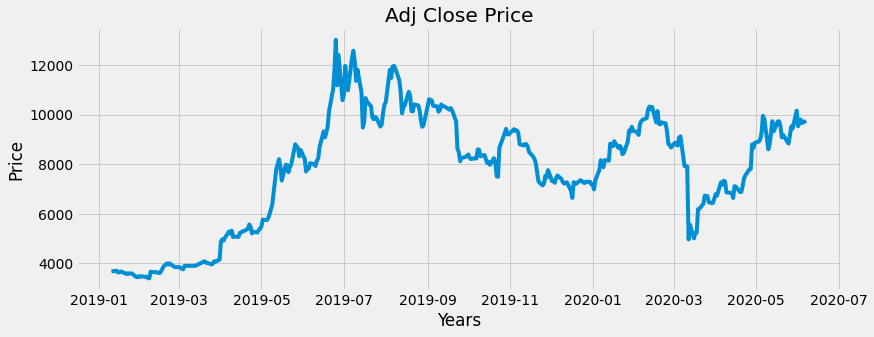

In [51]:
#Visually show the price

plt.figure(figsize=(12.2, 4.5))
plt.plot(BTC.index, BTC['Adj Close'])
plt.title('Adj Close Price')
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

In [52]:
#Prepare the data to calculate the RSI
#Get the difference in price from the previous day
delta = BTC['Adj Close'].diff(1)
delta

Date
2019-01-10           NaN
2019-01-11      8.441895
2019-01-14     18.686523
2019-01-15    -75.377930
2019-01-16     24.332031
                 ...    
2020-06-01   -629.212891
2020-06-02    122.094727
2020-06-03    144.360352
2020-06-04   -135.310547
2020-06-07     85.090820
Name: Adj Close, Length: 368, dtype: float64

In [53]:
#Get rid og NaN
delta = delta.dropna()
delta

Date
2019-01-11      8.441895
2019-01-14     18.686523
2019-01-15    -75.377930
2019-01-16     24.332031
2019-01-17     23.557617
                 ...    
2020-06-01   -629.212891
2020-06-02    122.094727
2020-06-03    144.360352
2020-06-04   -135.310547
2020-06-07     85.090820
Name: Adj Close, Length: 367, dtype: float64

In [0]:
#Get the positive gains (up) and the negative gains(down)
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down > 0] = 0 

In [0]:
#Get the time period
period = 14
#Calculate the average gain and the average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

In [0]:
#Calculate the RSI


# Calc the RS
RS = AVG_Gain / AVG_Loss
#Calc the RSI
RSI = 100.0-(100.0 /(1.0+RS))

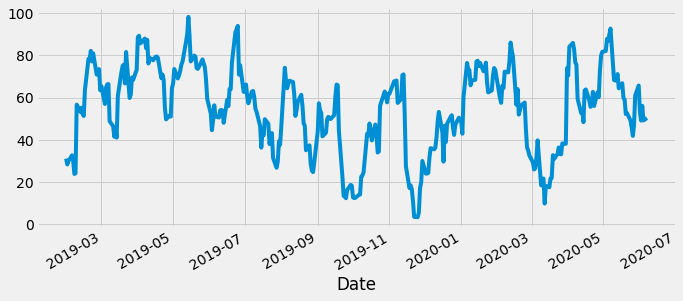

In [57]:
#Show the RSI visually
plt.figure(figsize=(10.2,4.5))
RSI.plot()
plt.show()

In [59]:
#Put it all together
#Create a new data frame
new_df = pd.DataFrame()
new_df['Adj Close'] = BTC['Adj Close']
new_df['RSI'] = RSI
new_df

,Adj Close,RSI
Date,,
2019-01-10,3678.924072,NaN
2019-01-11,3687.365967,NaN
2019-01-14,3706.052490,NaN
2019-01-15,3630.674561,NaN
2019-01-16,3655.006592,NaN
...,...,...
2020-06-01,9533.759766,52.937553
2020-06-02,9655.854492,49.061355
2020-06-03,9800.214844,56.072070


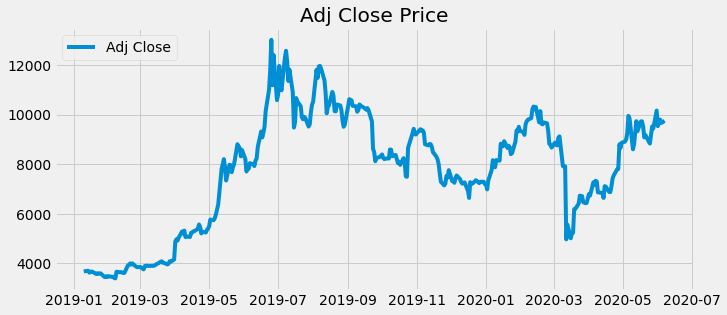

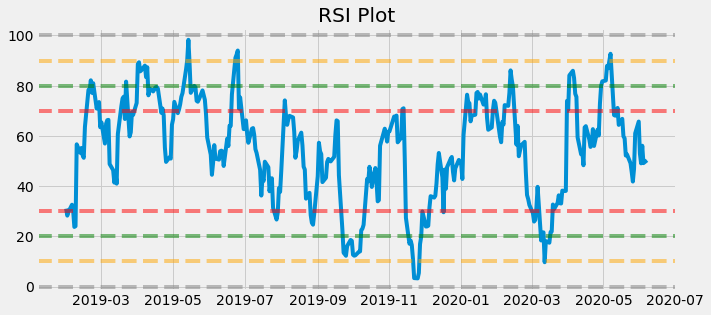

In [62]:
#Visually show the adjusted close price and RSI
#Plot the adj close price
plt.figure(figsize=(10.2,4.5))
plt.plot(new_df.index, new_df['Adj Close'])
plt.title('Adj Close Price')
plt.legend(new_df.columns.values, loc="upper left")
plt.show()
#plot the corresponding RSI values and the significant levels
plt.figure(figsize=(10.2,4.5))
plt.title('RSI Plot')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(0, linestyle='--', alpha = 0.5, color='gray')
plt.axhline(10, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(20, linestyle='--', alpha = 0.5, color='green')
plt.axhline(30, linestyle='--', alpha = 0.5, color='red')
plt.axhline(70, linestyle='--', alpha = 0.5, color='red')
plt.axhline(80, linestyle='--', alpha = 0.5, color='green')
plt.axhline(90, linestyle='--', alpha = 0.5, color='orange')
plt.axhline(100, linestyle='--', alpha = 0.5, color='gray')
plt.show()
